In [23]:
import pandas as pd
import numpy as np
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
nltk.download(['punkt','wordnet','stopwords'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sylva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sylva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sylva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df = pd.read_csv("comments.csv", sep=";", encoding="utf-8", skiprows=0, nrows=1000)
print(df)

                                                 event
0    il souhaite faire une loa sur une duree de 24 ...
1    il souhaite financer le vehicule au comptant o...
2    elle est a l'ecoute des offres en loa avec un ...
3    elle ne sait pas par quelle mode de financemen...
4            il souhaite un credit pour professionnel.
..                                                 ...
995                        il desire une offre de loa.
996  elle est interessee par les offres avec un app...
997  il souhaite une offre de financement sur 48 mo...
998  il souhaite faire un credit de 10.000 eur sur ...
999  il souhaite une offre de financement sur 48 mo...

[1000 rows x 1 columns]


nb de mots, nb de phrases, nb caractères, moyenne du nb de mots par phrase et la moyenne du nombre de caractères par mots

In [25]:
df.describe()

,event
count,1000
unique,474
top,il est interesse par les offres.
freq,27


In [26]:
df

,event
0,il souhaite faire une loa sur une duree de 24 ...
1,il souhaite financer le vehicule au comptant o...
2,elle est a l'ecoute des offres en loa avec un ...
3,elle ne sait pas par quelle mode de financemen...
4,il souhaite un credit pour professionnel.
...,...
995,il desire une offre de loa.
996,elle est interessee par les offres avec un app...
997,il souhaite une offre de financement sur 48 mo...
998,il souhaite faire un credit de 10.000 eur sur ...


In [27]:
df['nb_mots']= df['event'].apply(lambda x : len(str(x).split(" ")))
df['nb_carac']= df['event'].apply(lambda x: sum(len(mot) for mot in str(x).split(" ")))
df["sentence_count"]= df['event'].apply(lambda x: len(str(x).split(". ")))
df["avg_word_length"]= round(df['nb_carac'] / df['nb_mots'],0)
df["avg_sentence_lenght"]= round(df['nb_mots'] / df['sentence_count'],0)
#df['event'] = df['event'].map(lambda x : re.sub('[,\.!?]','',x)).map(lambda x : re.sub('\d','',x))

somme_nb_carac=sum(df['nb_carac'])
print(somme_nb_carac)
print(df['event'][1])
df

39956
il souhaite financer le vehicule au comptant ou aupres de sa banque.


,event,nb_mots,nb_carac,sentence_count,avg_word_length,avg_sentence_lenght
0,il souhaite faire une loa sur une duree de 24 ...,11,40,1,4.0,11.0
1,il souhaite financer le vehicule au comptant o...,12,57,1,5.0,12.0
2,elle est a l'ecoute des offres en loa avec un ...,13,53,1,4.0,13.0
3,elle ne sait pas par quelle mode de financemen...,10,45,1,4.0,10.0
4,il souhaite un credit pour professionnel.,6,36,1,6.0,6.0
...,...,...,...,...,...,...
995,il desire une offre de loa.,6,22,1,4.0,6.0
996,elle est interessee par les offres avec un app...,11,50,1,5.0,11.0
997,il souhaite une offre de financement sur 48 mo...,15,80,1,5.0,15.0
998,il souhaite faire un credit de 10.000 eur sur ...,11,44,1,4.0,11.0


In [28]:
#on supprime la ponctuation et les chiffres

df['event'] = df['event'].map(lambda x : re.sub(r'[^a-zA-Z ]', '',x))
df['event'] = df['event'].apply(lambda x : nltk.word_tokenize(x))
df['event']


0      [il, souhaite, faire, une, loa, sur, une, dure...
1      [il, souhaite, financer, le, vehicule, au, com...
2      [elle, est, a, lecoute, des, offres, en, loa, ...
3      [elle, ne, sait, pas, par, quelle, mode, de, f...
4        [il, souhaite, un, credit, pour, professionnel]
                             ...                        
995                    [il, desire, une, offre, de, loa]
996    [elle, est, interessee, par, les, offres, avec...
997    [il, souhaite, une, offre, de, financement, su...
998    [il, souhaite, faire, un, credit, de, eur, sur...
999    [il, souhaite, une, offre, de, financement, su...
Name: event, Length: 1000, dtype: object

In [29]:
french_stopwords = stopwords.words('french')
french_stopwords = french_stopwords + ['euro', 'euros', 'eur', 'km']
print(french_stopwords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [30]:
#df['event'] = df['event'].apply(lambda x : re.sub(mot,'',x) if mot in french_stopwords)
df['event'] = df['event'].apply(lambda x : [item for item in x if item not in french_stopwords])
df['event']

0                    [souhaite, faire, loa, duree, mois]
1      [souhaite, financer, vehicule, comptant, aupre...
2                      [a, lecoute, offres, loa, apport]
3               [sait, quelle, mode, financement, opter]
4                      [souhaite, credit, professionnel]
                             ...                        
995                                 [desire, offre, loa]
996             [interessee, offres, apport, a, definir]
997    [souhaite, offre, financement, mois, sans, gar...
998                      [souhaite, faire, credit, mois]
999    [souhaite, offre, financement, mois, sans, gar...
Name: event, Length: 1000, dtype: object

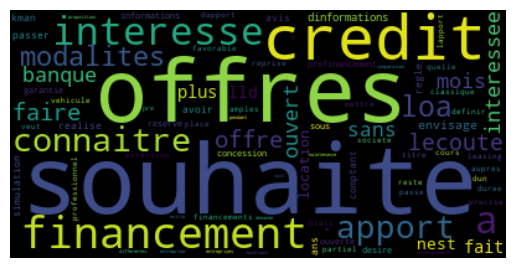

In [31]:
liste_mots = []
for mots in df['event']:
    liste_mots.extend(mots)
# Compter la fréquence de chaque mot
compteur_mots = Counter(liste_mots)
# Obtenir les mots les plus fréquents
top_mots = compteur_mots.most_common(1000)
# Générer un nuage de mots à partir des mots les plus fréquents
nuage_mots = WordCloud().generate_from_frequencies(dict(top_mots))
plt.imshow(nuage_mots, interpolation='bilinear')
plt.axis("off")
plt.show()

# mettre un nuage de mots sur discord d'ici mardi matin 9h35 max



In [32]:
df_2=df.copy()
stemmer=SnowballStemmer('french')
df_2['event']=df_2['event'].apply(lambda x: [stemmer.stem(item) for item in x ])
df_2

,event,nb_mots,nb_carac,sentence_count,avg_word_length,avg_sentence_lenght
0,"[souhait, fair, lo, dure, mois]",11,40,1,4.0,11.0
1,"[souhait, financ, vehicul, compt, aupr, banqu]",12,57,1,5.0,12.0
2,"[a, lecout, offre, lo, apport]",13,53,1,4.0,13.0
3,"[sait, quel, mod, financ, opter]",10,45,1,4.0,10.0
4,"[souhait, cred, professionnel]",6,36,1,6.0,6.0
...,...,...,...,...,...,...
995,"[desir, offre, lo]",6,22,1,4.0,6.0
996,"[interesse, offre, apport, a, defin]",11,50,1,5.0,11.0
997,"[souhait, offre, financ, mois, san, garant, me...",15,80,1,5.0,15.0
998,"[souhait, fair, cred, mois]",11,44,1,4.0,11.0


In [33]:
#!pip install spacy
import spacy.cli
spacy.cli.download("fr_core_news_md")
nlp = spacy.load('fr_core_news_md')

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [34]:
# Compter la fréquence de chaque mot dans la colonne 'event'
counts = Counter()
for row in df_2['event']:
    counts.update(row)

# Afficher les résultats
print(counts)
print(len(counts))

Counter({'offre': 436, 'souhait': 424, 'cred': 324, 'financ': 274, 'a': 210, 'interess': 205, 'connaitr': 169, 'apport': 161, 'lo': 128, 'modalit': 123, 'fair': 93, 'lecout': 82, 'ouvert': 81, 'interesse': 70, 'banqu': 68, 'mois': 66, 'san': 58, 'plus': 46, 'fait': 46, 'nest': 40, 'lld': 38, 'locat': 37, 'dinform': 34, 'envisag': 32, 'pass': 30, 'regl': 29, 'compt': 26, 'avis': 25, 'kman': 23, 'realis': 23, 'an': 23, 'simul': 21, 'avoir': 20, 'prefinanc': 19, 'desir': 18, 'garant': 18, 'sous': 17, 'inform': 15, 'reserv': 15, 'extens': 13, 'concess': 13, 'aupr': 11, 'quel': 10, 'dapport': 10, 'mettr': 10, 'plac': 10, 'repris': 9, 'ample': 9, 'favor': 9, 'precis': 9, 'lapport': 8, 'classiqu': 8, 'vehicul': 7, 'dun': 7, 'partiel': 7, 'societ': 6, 'bi': 6, 'cour': 6, 'rest': 6, 'entrepris': 6, 'defin': 6, 'dure': 5, 'professionnel': 5, 'veut': 5, 'leasing': 5, 'titr': 5, 'pre': 4, 'e': 4, 'proposit': 4, 'sait': 3, 'mainten': 3, 'pend': 3, 'personnel': 3, 'effectu': 3, 'renseign': 3, 'deman

[('offre', 436), ('souhait', 424), ('cred', 324), ('financ', 274), ('a', 210), ('interess', 205), ('connaitr', 169), ('apport', 161), ('lo', 128), ('modalit', 123), ('fair', 93), ('lecout', 82), ('ouvert', 81), ('interesse', 70), ('banqu', 68), ('mois', 66), ('san', 58), ('plus', 46), ('fait', 46), ('nest', 40), ('lld', 38), ('locat', 37), ('dinform', 34), ('envisag', 32), ('pass', 30), ('regl', 29), ('compt', 26), ('avis', 25), ('kman', 23), ('realis', 23), ('an', 23), ('simul', 21), ('avoir', 20), ('prefinanc', 19), ('desir', 18), ('garant', 18), ('sous', 17), ('inform', 15), ('reserv', 15), ('extens', 13), ('concess', 13), ('aupr', 11), ('quel', 10), ('dapport', 10), ('mettr', 10), ('plac', 10), ('repris', 9), ('ample', 9), ('favor', 9), ('precis', 9), ('lapport', 8), ('classiqu', 8), ('vehicul', 7), ('dun', 7), ('partiel', 7), ('societ', 6), ('bi', 6), ('cour', 6), ('rest', 6), ('entrepris', 6), ('defin', 6), ('dure', 5), ('professionnel', 5), ('veut', 5), ('leasing', 5), ('titr', 

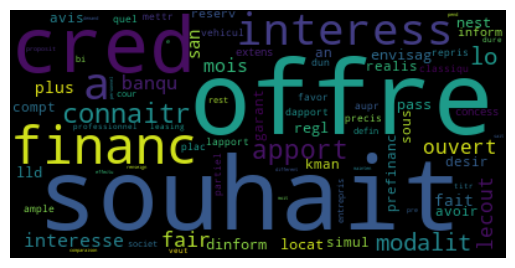

In [35]:
liste_mots = []
for mots in df_2['event']:
    liste_mots.extend(mots)
# Compter la fréquence de chaque mot
compteur_mots = Counter(liste_mots)
# Obtenir les mots les plus fréquents
top_mots = compteur_mots.most_common(100)
print(top_mots)
# Générer un nuage de mots à partir des mots les plus fréquents
nuage_mots = WordCloud().generate_from_frequencies(dict(top_mots))
plt.imshow(nuage_mots, interpolation='bilinear')
plt.axis("off")
plt.show()
